In [ ]:
import tensorflow as tf
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
from shutil import copy  
from shutil import copytree, rmtree
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from tensorflow.keras import models
import cv2

In [ ]:
import pandas as pd
import numpy as np
import math
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
	tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
	print('Could not set GPU memory growth')
	pass

## Load both legitmate & DGA domains

In [ ]:
Domain_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DLDomain_MCLS2.csv')
Domain_data.drop(["Unnamed: 0"], axis=1, inplace=True)
Domain_data.head()

,domain_name,label,domain
0,odqzesdvd.info,nymaim,odqzesdvd
1,mcrwnxdzu.info,nymaim,mcrwnxdzu
2,poxrscvfoy.biz,nymaim,poxrscvfoy
3,dupzwi.info,nymaim,dupzwi
4,pgldibr.com,nymaim,pgldibr


In [ ]:
grouped = Domain_data.groupby('label')
Domain_data = grouped.filter(lambda x: x['label'].count() > 5.)

In [ ]:
Domain_data.domain=Domain_data.domain.astype(str)

In [ ]:
from sklearn.preprocessing import LabelEncoder
X = Domain_data.domain
Y = Domain_data['label']

In [ ]:
from sklearn.preprocessing import LabelBinarizer
Y = LabelBinarizer().fit_transform(Y)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.models import Sequential

#max_words = num_words
max_len = 50

# Tokenizer
tok = Tokenizer(num_words=None, char_level=True, oov_token='UNK')
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,padding='post',maxlen=max_len)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sequences_matrix, Y, test_size=0.20,random_state=42)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
strategy = {0:16613,1:16613,2:16613, 4:16613, 5:16613,  6:16613,7:16613, 8:16613, 9:16613, 10:16613, 12:16613, 13:16613, 15:16613, 16:16613, 18:16613, 17:16613,19:16613,21:16613, 22:16613,23:16613, 24:16613,25:16613, 26:16613,27:16613,28:16613,29:16613,30:16613,31:16613,33:16613,34:16613,35:16613,37:16613,42:16613,39:16613,40:16613,43:16613,44:16613,46:16613,47:16613, 48:16613, 49:16613,50:16613,51:16613}
#for i in minmum_classes:
ovrsmt = RandomOverSampler(sampling_strategy=strategy)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
udrsmt = RandomUnderSampler(sampling_strategy={38:143527,20:203528,11:193527,3:193529})

In [ ]:
from imblearn.pipeline import Pipeline
steps = [('o', ovrsmt), ('u', udrsmt)]
pipeline = Pipeline(steps=steps)

In [ ]:
X_train, y_train = pipeline.fit_resample(X_train, y_train)

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/MX_train_sm.csv'
pickle.dump(X_train, open(filename, 'wb'))

In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/MX_test_sm.csv'
pickle.dump(X_test, open(filename, 'wb'))


In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/My_train_sm.csv'
pickle.dump(y_train, open(filename, 'wb'))

In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/My_test_sm.csv'
pickle.dump(y_test, open(filename, 'wb'))

## Load both legitmate & DGA domains

In [ ]:
Domain_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Super_MLDOMAIN_MCLS2.csv')
Domain_data.drop(["Unnamed: 0"], axis=1, inplace=True)
Domain_data.head()

,domain_name,dga_family,domain,length,entropy,first_Digit_Index,H_entropy,vowel_consonant_ratio,vowel_character_ratio,consonant_character_ratio,level_no,alexa_grams,words_grams
0,odqzesdvd.info,Super_family_2,odqzesdvd,9,2.641604,0,3.324863,0.444444,0.285714,0.642857,2,8.618689,10.200253
1,mcrwnxdzu.info,Super_family_2,mcrwnxdzu,9,3.169925,0,3.664498,0.300000,0.214286,0.714286,2,5.331953,4.442651
2,poxrscvfoy.biz,Super_family_2,poxrscvfoy,10,3.121928,0,3.664498,0.300000,0.214286,0.714286,2,9.758886,11.231941
3,dupzwi.info,Super_family_2,dupzwi,6,2.584963,0,3.277613,0.666667,0.363636,0.545455,2,3.861893,7.928046
4,pgldibr.com,Super_family_2,pgldibr,7,2.807355,0,3.459432,0.250000,0.181818,0.727273,2,12.146719,20.785039


In [ ]:
Domain_data.domain=Domain_data.domain.astype(str)

In [ ]:
from sklearn.preprocessing import LabelEncoder
X = Domain_data.domain
Y = Domain_data['dga_family']

In [ ]:
from sklearn.preprocessing import LabelBinarizer
Y = LabelBinarizer().fit_transform(Y)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.models import Sequential

#max_words = num_words
max_len = 50

# Tokenizer
tok = Tokenizer(num_words=None, char_level=True, oov_token='UNK')
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,padding='post',maxlen=max_len)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sequences_matrix, Y, test_size=0.20,random_state=42)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
strategy = {2:166131,3:166131,4:249197, 5:166131} 
ovrsmt = RandomOverSampler(sampling_strategy=strategy)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
udrsmt = RandomUnderSampler(sampling_strategy={0:332262,1:581459})

In [ ]:
from imblearn.pipeline import Pipeline
steps = [('o', ovrsmt), ('u', udrsmt)]
pipeline = Pipeline(steps=steps)

In [ ]:
X_train, y_train = pipeline.fit_resample(X_train, y_train)

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/SMX_train_sm.csv'
pickle.dump(X_train, open(filename, 'wb'))

In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/SMX_test_sm.csv'
pickle.dump(X_test, open(filename, 'wb'))


In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/SMy_train_sm.csv'
pickle.dump(y_train, open(filename, 'wb'))

In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/SMy_test_sm.csv'
pickle.dump(y_test, open(filename, 'wb'))

## CNN

In [ ]:
from keras.models import Sequential
from keras import layers 

embedding_dim = 100
vocab_size=70
textcnnmodel = Sequential()
textcnnmodel.add(layers.Embedding(vocab_size, embedding_dim, input_length=max_len))
textcnnmodel.add(layers.Conv1D(128, 5, activation='relu'))
textcnnmodel.add(layers.GlobalMaxPooling1D())
textcnnmodel.add(layers.Flatten())
textcnnmodel.add(layers.Dense(250, activation='relu'))
textcnnmodel.add(layers.Dense(Domain_data['label'].nunique(), activation='softmax'))
textcnnmodel.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
textcnnmodel.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 50, 100)           7000      
                                                                 
 conv1d_4 (Conv1D)           (None, 46, 128)           64128     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 250)               32250     
                                                                 
 dense_9 (Dense)             (None, 57)                14307     
                                                      

In [ ]:
history=textcnnmodel.fit(X_train,y_train,
                     epochs=20,
                     verbose=True,
                     validation_data=(X_test, y_test),
                     batch_size=500)

Epoch 1/20
3518/3518 [==============================] - 65s 18ms/step - loss: 0.3076 - accuracy: 0.9257 - val_loss: 0.2223 - val_accuracy: 0.9453
Epoch 2/20
3518/3518 [==============================] - 66s 19ms/step - loss: 0.1986 - accuracy: 0.9510 - val_loss: 0.2028 - val_accuracy: 0.9502
Epoch 3/20
3518/3518 [==============================] - 62s 18ms/step - loss: 0.1854 - accuracy: 0.9535 - val_loss: 0.1962 - val_accuracy: 0.9518
Epoch 4/20
3518/3518 [==============================] - 63s 18ms/step - loss: 0.1779 - accuracy: 0.9549 - val_loss: 0.1902 - val_accuracy: 0.9510
Epoch 5/20
3518/3518 [==============================] - 63s 18ms/step - loss: 0.1728 - accuracy: 0.9558 - val_loss: 0.1779 - val_accuracy: 0.9547
Epoch 6/20
3518/3518 [==============================] - 66s 19ms/step - loss: 0.1692 - accuracy: 0.9566 - val_loss: 0.1790 - val_accuracy: 0.9548
Epoch 7/20
3518/3518 [==============================] - 63s 18ms/step - loss: 0.1660 - accuracy: 0.9571 - val_loss: 0.1795 -

In [ ]:
loss, accuracy = textcnnmodel.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = textcnnmodel.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9629
Testing Accuracy:  0.9583


## LSTM

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Conv1D, Embedding, Flatten
def RNN_model():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(input_dim = max_len + 1,output_dim = 32,input_length=max_len)(inputs)
    layer = LSTM(32)(layer)
    layer = Flatten()(layer)

    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)

    layer = Dense(Domain_data['dga_family'].nunique(),name='out_layer')(layer)
    layer = Activation('softmax')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
from tensorflow.keras.models import Sequential, Model
model = RNN_model()
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 50)]              0         
                                                                 
 embedding_4 (Embedding)     (None, 50, 32)            1632      
                                                                 
 lstm_4 (LSTM)               (None, 32)                8320      
                                                                 
 flatten_4 (Flatten)         (None, 32)                0         
                                                                 
 FC1 (Dense)                 (None, 256)               8448      
                                                                 
 activation_8 (Activation)   (None, 256)               0         
                                                                 
 dropout_4 (Dropout)         (None, 256)               0   

In [ ]:
import time
start=time.time()
history=model.fit(X_train,y_train,batch_size=1000,epochs=100,
          validation_data=(X_test, y_test))
end=time.time()
print('LSTM multiclass Training finished in {} milisecond!!\n'.format(end-start))

Epoch 1/100
1662/1662 [==============================] - 16s 8ms/step - loss: 0.4798 - acc: 0.8059 - val_loss: 0.2890 - val_acc: 0.8876
Epoch 2/100
1662/1662 [==============================] - 14s 9ms/step - loss: 0.2718 - acc: 0.8819 - val_loss: 0.2776 - val_acc: 0.8786
Epoch 3/100
1662/1662 [==============================] - 13s 8ms/step - loss: 0.2505 - acc: 0.8913 - val_loss: 0.2424 - val_acc: 0.8881
Epoch 4/100
1662/1662 [==============================] - 13s 8ms/step - loss: 0.2160 - acc: 0.9092 - val_loss: 0.2361 - val_acc: 0.8935
Epoch 5/100
1662/1662 [==============================] - 13s 8ms/step - loss: 0.1968 - acc: 0.9213 - val_loss: 0.1905 - val_acc: 0.9251
Epoch 6/100
1662/1662 [==============================] - 13s 8ms/step - loss: 0.1732 - acc: 0.9318 - val_loss: 0.1602 - val_acc: 0.9396
Epoch 7/100
1662/1662 [==============================] - 13s 8ms/step - loss: 0.1620 - acc: 0.9373 - val_loss: 0.1631 - val_acc: 0.9359
Epoch 8/100
1662/1662 [=========================

In [ ]:
start=time.time()
results = model.evaluate(X_test, y_test)
end=time.time()
print('LSTM multiclass Testing finished in {} milisecond!!\n'.format(end-start))
print ("Accuracy on test set:" , results)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

12979/12979 [==============================] - 45s 3ms/step - loss: 0.0498 - acc: 0.9844
LSTM multiclass Testing finished in 45.508588552474976 milisecond!!

Accuracy on test set: [0.04975096881389618, 0.9843665957450867]
Test loss: 0.04975096881389618
Test accuracy: 0.9843665957450867


In [ ]:
y_pred1 = model.predict(X_test)
y_pred1=(y_pred1 > 0.5)
accr = model.evaluate(X_test,y_test)
rnn_acc=accr[1]
print('Test set\n   Accuracy: {:0.3f}'.format(accr[1]))



12979/12979 [==============================] - 47s 4ms/step - loss: 0.0498 - acc: 0.9844
Test set
   Accuracy: 0.984


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.97      0.98      0.98    122348
           1       0.99      0.99      0.99    250598
           2       0.99      0.99      0.99     40114
           3       0.91      0.99      0.95       257
           4       0.67      0.88      0.76      1983
           5       1.00      1.00      1.00        28

   micro avg       0.98      0.98      0.98    415328
   macro avg       0.92      0.97      0.94    415328
weighted avg       0.98      0.98      0.98    415328
 samples avg       0.98      0.98      0.98    415328





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


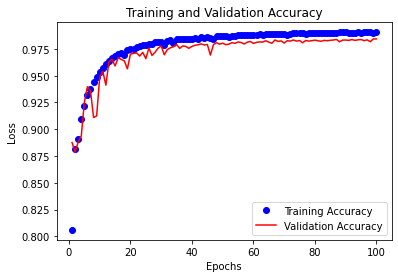

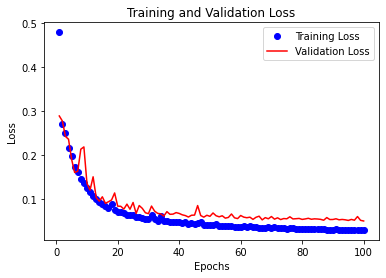

In [ ]:
def Training_and_validation_plot(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
Training_and_validation_plot(history)

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/SMCLS_lstmmodel32,1000x100_2.sav'
pickle.dump(model, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://b8a8225c-f17d-4b81-955d-8743f36846c1/assets


INFO:tensorflow:Assets written to: ram://b8a8225c-f17d-4b81-955d-8743f36846c1/assets


## LSTM

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Conv1D, Embedding, Flatten
def RNN_model():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(input_dim = max_len + 1,output_dim = 64,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Flatten()(layer)

    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)

    layer = Dense(Domain_data['dga_family'].nunique(),name='out_layer')(layer)
    layer = Activation('softmax')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
from tensorflow.keras.models import Sequential, Model
model = RNN_model()
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 50)]              0         
                                                                 
 embedding_3 (Embedding)     (None, 50, 64)            3264      
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 flatten_3 (Flatten)         (None, 64)                0         
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation_6 (Activation)   (None, 256)               0         
                                                                 
 dropout_3 (Dropout)         (None, 256)               0   

In [ ]:
import time
start=time.time()
history=model.fit(X_train,y_train,batch_size=1000,epochs=100,
          validation_data=(X_test, y_test))
end=time.time()
print('LSTM multiclass Training finished in {} milisecond!!\n'.format(end-start))

Epoch 1/100
1662/1662 [==============================] - 24s 13ms/step - loss: 0.4423 - acc: 0.8221 - val_loss: 0.3147 - val_acc: 0.8525
Epoch 2/100
1662/1662 [==============================] - 19s 11ms/step - loss: 0.2553 - acc: 0.8890 - val_loss: 0.2079 - val_acc: 0.9178
Epoch 3/100
1662/1662 [==============================] - 19s 11ms/step - loss: 0.2047 - acc: 0.9112 - val_loss: 0.1766 - val_acc: 0.9266
Epoch 4/100
1662/1662 [==============================] - 19s 11ms/step - loss: 0.1710 - acc: 0.9309 - val_loss: 0.1344 - val_acc: 0.9449
Epoch 5/100
1662/1662 [==============================] - 19s 12ms/step - loss: 0.1362 - acc: 0.9470 - val_loss: 0.1389 - val_acc: 0.9415
Epoch 6/100
1662/1662 [==============================] - 19s 11ms/step - loss: 0.1282 - acc: 0.9518 - val_loss: 0.1242 - val_acc: 0.9507
Epoch 7/100
1662/1662 [==============================] - 19s 11ms/step - loss: 0.1003 - acc: 0.9631 - val_loss: 0.1221 - val_acc: 0.9512
Epoch 8/100
1662/1662 [==================

In [ ]:
start=time.time()
results = model.evaluate(X_test, y_test)
end=time.time()
print('LSTM multiclass Testing finished in {} milisecond!!\n'.format(end-start))
print ("Accuracy on test set:" , results)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

12979/12979 [==============================] - 46s 4ms/step - loss: 0.0526 - acc: 0.9881
LSTM multiclass Testing finished in 82.30069708824158 milisecond!!

Accuracy on test set: [0.05258379131555557, 0.988108217716217]
Test loss: 0.05258379131555557
Test accuracy: 0.988108217716217


In [ ]:
y_pred1 = model.predict(X_test)
y_pred1=(y_pred1 > 0.5)
accr = model.evaluate(X_test,y_test)
rnn_acc=accr[1]
print('Test set\n   Accuracy: {:0.3f}'.format(accr[1]))



12979/12979 [==============================] - 46s 4ms/step - loss: 0.0526 - acc: 0.9881
Test set
   Accuracy: 0.988


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.98      0.98      0.98    122348
           1       0.99      0.99      0.99    250598
           2       1.00      0.99      0.99     40114
           3       0.91      0.97      0.94       257
           4       0.77      0.86      0.81      1983
           5       1.00      1.00      1.00        28

   micro avg       0.99      0.99      0.99    415328
   macro avg       0.94      0.97      0.95    415328
weighted avg       0.99      0.99      0.99    415328
 samples avg       0.99      0.99      0.99    415328





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


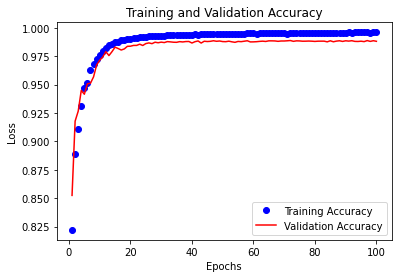

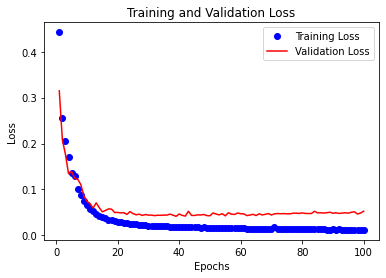

In [ ]:
def Training_and_validation_plot(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
Training_and_validation_plot(history)

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/SMCLS_lstmmodel64,1000x100_2.sav'
pickle.dump(model, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://530e1629-0ad6-4b46-bf28-366837e81ac4/assets


INFO:tensorflow:Assets written to: ram://530e1629-0ad6-4b46-bf28-366837e81ac4/assets


## LSTM

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Conv1D, Embedding, Flatten
def RNN_model():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(input_dim = max_len + 1,output_dim = 50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Flatten()(layer)

    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)

    layer = Dense(Domain_data['dga_family'].nunique(),name='out_layer')(layer)
    layer = Activation('softmax')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
from tensorflow.keras.models import Sequential, Model
model = RNN_model()
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 50)]              0         
                                                                 
 embedding_2 (Embedding)     (None, 50, 50)            2550      
                                                                 
 lstm_2 (LSTM)               (None, 64)                29440     
                                                                 
 flatten_2 (Flatten)         (None, 64)                0         
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0   

In [ ]:
import time
start=time.time()
history=model.fit(X_train,y_train,batch_size=1000,epochs=100,
          validation_data=(X_test, y_test))
end=time.time()
print('LSTM multiclass Training finished in {} milisecond!!\n'.format(end-start))

Epoch 1/100
1662/1662 [==============================] - 22s 12ms/step - loss: 0.4966 - acc: 0.8061 - val_loss: 0.3297 - val_acc: 0.8742
Epoch 2/100
1662/1662 [==============================] - 20s 12ms/step - loss: 0.2933 - acc: 0.8745 - val_loss: 0.2569 - val_acc: 0.9029
Epoch 3/100
1662/1662 [==============================] - 19s 11ms/step - loss: 0.2320 - acc: 0.8988 - val_loss: 0.2095 - val_acc: 0.9137
Epoch 4/100
1662/1662 [==============================] - 19s 12ms/step - loss: 0.1903 - acc: 0.9223 - val_loss: 0.1619 - val_acc: 0.9378
Epoch 5/100
1662/1662 [==============================] - 18s 11ms/step - loss: 0.1536 - acc: 0.9390 - val_loss: 0.1335 - val_acc: 0.9483
Epoch 6/100
1662/1662 [==============================] - 19s 11ms/step - loss: 0.1259 - acc: 0.9508 - val_loss: 0.1013 - val_acc: 0.9626
Epoch 7/100
1662/1662 [==============================] - 18s 11ms/step - loss: 0.1039 - acc: 0.9610 - val_loss: 0.1006 - val_acc: 0.9623
Epoch 8/100
1662/1662 [==================

In [ ]:
start=time.time()
results = model.evaluate(X_test, y_test)
end=time.time()
print('LSTM multiclass Testing finished in {} milisecond!!\n'.format(end-start))
print ("Accuracy on test set:" , results)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

12979/12979 [==============================] - 47s 4ms/step - loss: 0.0490 - acc: 0.9883
LSTM multiclass Testing finished in 47.0619695186615 milisecond!!

Accuracy on test set: [0.049019936472177505, 0.988344132900238]
Test loss: 0.049019936472177505
Test accuracy: 0.988344132900238


In [ ]:
y_pred1 = model.predict(X_test)
y_pred1=(y_pred1 > 0.5)
accr = model.evaluate(X_test,y_test)
rnn_acc=accr[1]
print('Test set\n   Accuracy: {:0.3f}'.format(accr[1]))



12979/12979 [==============================] - 47s 4ms/step - loss: 0.0490 - acc: 0.9883
Test set
   Accuracy: 0.988


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.98      0.99      0.98    122348
           1       0.99      0.99      0.99    250598
           2       0.99      0.99      0.99     40114
           3       0.92      0.98      0.95       257
           4       0.81      0.84      0.82      1983
           5       1.00      1.00      1.00        28

   micro avg       0.99      0.99      0.99    415328
   macro avg       0.95      0.96      0.96    415328
weighted avg       0.99      0.99      0.99    415328
 samples avg       0.99      0.99      0.99    415328





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


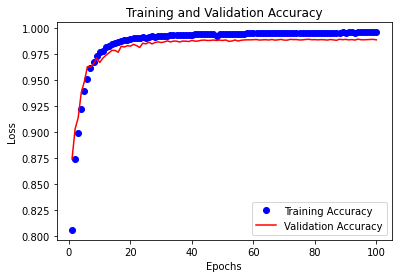

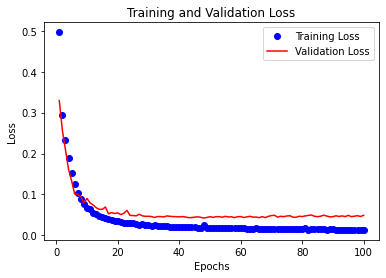

In [ ]:
def Training_and_validation_plot(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
Training_and_validation_plot(history)

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/SMCLS_lstmmodel64,1000x100.sav'
pickle.dump(model, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://98e7af00-e821-44e3-b7dc-65b038ba5991/assets


INFO:tensorflow:Assets written to: ram://98e7af00-e821-44e3-b7dc-65b038ba5991/assets


## LSTM

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Conv1D, Embedding, Flatten
def RNN_model():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(input_dim = max_len + 1,output_dim = 50,input_length=max_len)(inputs)
    layer = LSTM(32)(layer)
    layer = Flatten()(layer)

    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)

    layer = Dense(Domain_data['dga_family'].nunique(),name='out_layer')(layer)
    layer = Activation('softmax')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
from tensorflow.keras.models import Sequential, Model
model = RNN_model()
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 50)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 50, 50)            2550      
                                                                 
 lstm_1 (LSTM)               (None, 32)                10624     
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 FC1 (Dense)                 (None, 256)               8448      
                                                                 
 activation_2 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0   

In [ ]:
import time
start=time.time()
history=model.fit(X_train,y_train,batch_size=1000,epochs=100,
          validation_data=(X_test, y_test))
end=time.time()
print('LSTM multiclass Training finished in {} milisecond!!\n'.format(end-start))

Epoch 1/100
1662/1662 [==============================] - 26s 10ms/step - loss: 0.4985 - acc: 0.7960 - val_loss: 0.3489 - val_acc: 0.8659
Epoch 2/100
1662/1662 [==============================] - 14s 9ms/step - loss: 0.2752 - acc: 0.8832 - val_loss: 0.2342 - val_acc: 0.9089
Epoch 3/100
1662/1662 [==============================] - 14s 8ms/step - loss: 0.2499 - acc: 0.8961 - val_loss: 0.2518 - val_acc: 0.8899
Epoch 4/100
1662/1662 [==============================] - 15s 9ms/step - loss: 0.2085 - acc: 0.9140 - val_loss: 0.2254 - val_acc: 0.9006
Epoch 5/100
1662/1662 [==============================] - 15s 9ms/step - loss: 0.1985 - acc: 0.9212 - val_loss: 0.1922 - val_acc: 0.9165
Epoch 6/100
1662/1662 [==============================] - 16s 9ms/step - loss: 0.1635 - acc: 0.9343 - val_loss: 0.1663 - val_acc: 0.9298
Epoch 7/100
1662/1662 [==============================] - 15s 9ms/step - loss: 0.1450 - acc: 0.9436 - val_loss: 0.1750 - val_acc: 0.9252
Epoch 8/100
1662/1662 [========================

In [ ]:
start=time.time()
results = model.evaluate(X_test, y_test)
end=time.time()
print('LSTM multiclass Testing finished in {} milisecond!!\n'.format(end-start))
print ("Accuracy on test set:" , results)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

12979/12979 [==============================] - 46s 4ms/step - loss: 0.0563 - acc: 0.9849
LSTM multiclass Testing finished in 82.33244323730469 milisecond!!

Accuracy on test set: [0.05630779638886452, 0.9849468469619751]
Test loss: 0.05630779638886452
Test accuracy: 0.9849468469619751


In [ ]:
y_pred1 = model.predict(X_test)
y_pred1=(y_pred1 > 0.5)
accr = model.evaluate(X_test,y_test)
rnn_acc=accr[1]
print('Test set\n   Accuracy: {:0.3f}'.format(accr[1]))



12979/12979 [==============================] - 46s 4ms/step - loss: 0.0563 - acc: 0.9849
Test set
   Accuracy: 0.985


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.97      0.98      0.98    122348
           1       0.99      0.99      0.99    250598
           2       0.99      0.99      0.99     40114
           3       0.94      0.96      0.95       257
           4       0.73      0.86      0.79      1983
           5       1.00      1.00      1.00        28

   micro avg       0.98      0.98      0.98    415328
   macro avg       0.94      0.96      0.95    415328
weighted avg       0.99      0.98      0.99    415328
 samples avg       0.98      0.98      0.98    415328





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


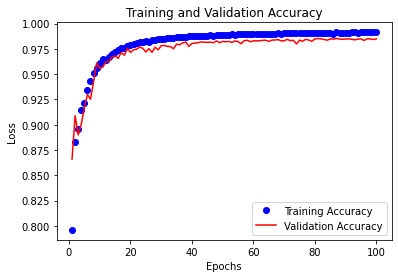

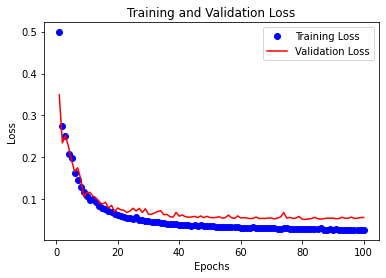

In [ ]:
def Training_and_validation_plot(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
Training_and_validation_plot(history)

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/MCLS_lstmmodel128,1000x100_2nd.sav'
pickle.dump(model, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://c62fa230-a4d7-4e5a-bc9b-c6cc8340c52f/assets


INFO:tensorflow:Assets written to: ram://c62fa230-a4d7-4e5a-bc9b-c6cc8340c52f/assets
